In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
#Qual a importância da movimentação portuário para a economia de Santos?
#Qual a importância da movimentação portuário para o Estado de São Paulo?

#correlação entre o pib per capta da cidade e do Estado em relação a toneladas, unidades e toneladas por unidade movimentadas por ano no porto

In [65]:
mensarios_dir = 'C:\\Users\\Gabriel\\Desktop\\mensários\\'
pibs_per_capta_dir = 'C:\\Users\\Gabriel\\Desktop\\pibs_per_capta.txt'

In [66]:
#lendo os arquivos com os pibs de Santos e São Paulo - FONTE: https://www.ibge.gov.br/cidades-e-estados/sp/santos.html e https://pib.seade.gov.br/anual/
pibs = pd.read_csv(pibs_per_capta_dir, delimiter=',')
pibs.head()

,LOCALIDADE,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,CIDADE DE SANTOS,36823.40,40156.46,43567.79,45970.88,46201.25,49977.22,51540.50,51906.56,52504.02,51780.01,55508.46
1,ESTADO DE SÃO PAULO,34552.27,31172.95,40544.87,43544.61,45065.21,47020.39,48558.31,50247.86,52992.03,53262.64,60583.09


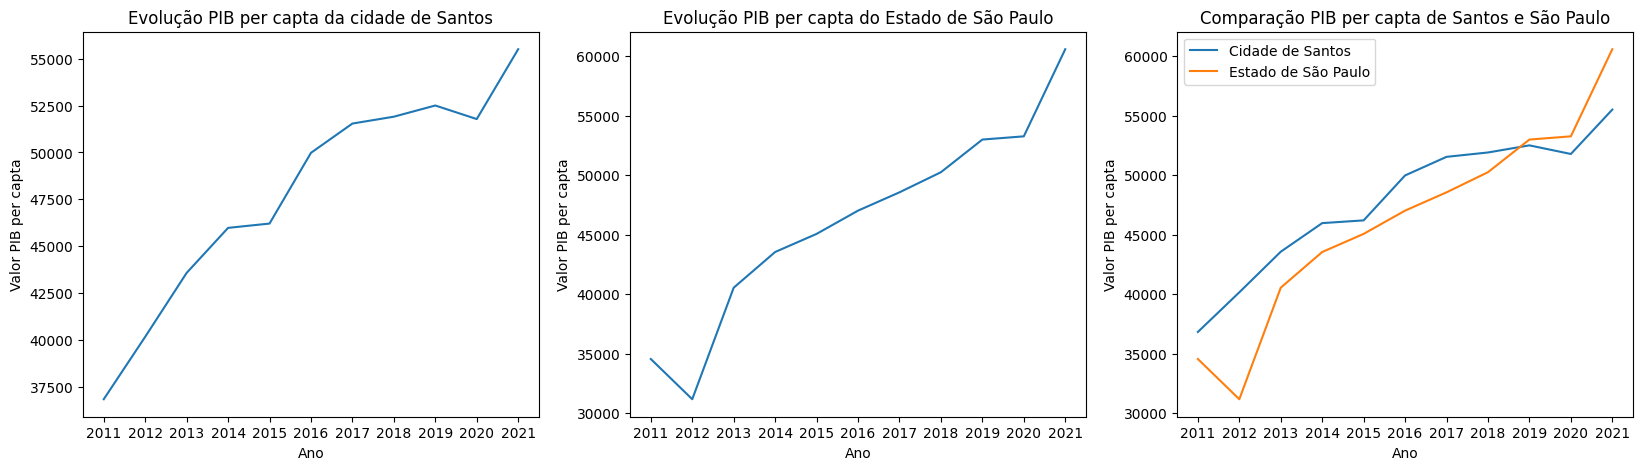

In [64]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.title('Evolução PIB per capta da cidade de Santos')
plt.xlabel('Ano')
plt.ylabel('Valor PIB per capta')
plt.plot(pibs.iloc[0][1:])

plt.subplot(1, 3, 2)
plt.title('Evolução PIB per capta do Estado de São Paulo')
plt.xlabel('Ano')
plt.ylabel('Valor PIB per capta')
plt.plot(pibs.iloc[1][1:])

plt.subplot(1, 3, 3)
plt.title('Comparação PIB per capta de Santos e São Paulo')
plt.xlabel('Ano')
plt.ylabel('Valor PIB per capta')
plt.plot(pibs.iloc[0][1:])
plt.plot(pibs.iloc[1][1:])
plt.legend(['Cidade de Santos', 'Estado de São Paulo'])

In [67]:
mensarios = []

for ano in range(2011, 2022):
    mensarios.append(pd.read_csv(mensarios_dir + f'mensario_{ano}.csv', sep=','))

In [70]:
mensarios[-1].columns

Index(['Ano', 'Mês', 'Berço', 'Tipo da instalação', 'Terminal',
       'Perfil da carga', 'Tipo de operação', 'Navegação', 'Sentido da carga',
       'Carga', 'Toneladas', 'TEUs', 'Unidades'],
      dtype='object')

In [97]:
np.array(mensarios[5]['Unidades']).sum()

nan

In [ ]:
from math import isnan

toneladas_por_ano = [sum(mensarios[i]['Toneladas']) for i in range(len(mensarios))]
unidades_por_ano = [sum(list(filter(lambda x: 0 if isnan(x) else x, mensarios[i]['Unidades']))) for i in range(len(mensarios))]
toneladas_por_unidade_por_ano = [toneladas_por_ano[i]/unidades_por_ano[i] for i in range(len(mensarios))]

In [131]:
from math import isnan

toneladas_por_ano = [sum(mensarios[i]['Toneladas']) for i in range(len(mensarios))]
unidades_por_ano = [sum(list(filter(lambda x: 0 if isnan(x) else x, mensarios[i]['Unidades']))) for i in range(len(mensarios))]

In [132]:
toneladas_por_ano_filtrada = [sum(list(filter(lambda x: 0 if isnan(x) else x, mensarios[i]['Unidades']))) for i in range(len(mensarios))]

for i in range(len(mensarios)):
    soma = 0
    for j in range(len(mensarios[i]['Unidades'])):
        if not isnan(mensarios[i]['Unidades'][j]):
            soma += mensarios[i]['Toneladas'][j]
    toneladas_por_ano_filtrada.append(soma)
toneladas_por_unidade_por_ano = [toneladas_por_ano[i]/unidades_por_ano[i] for i in range(len(mensarios))]

[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


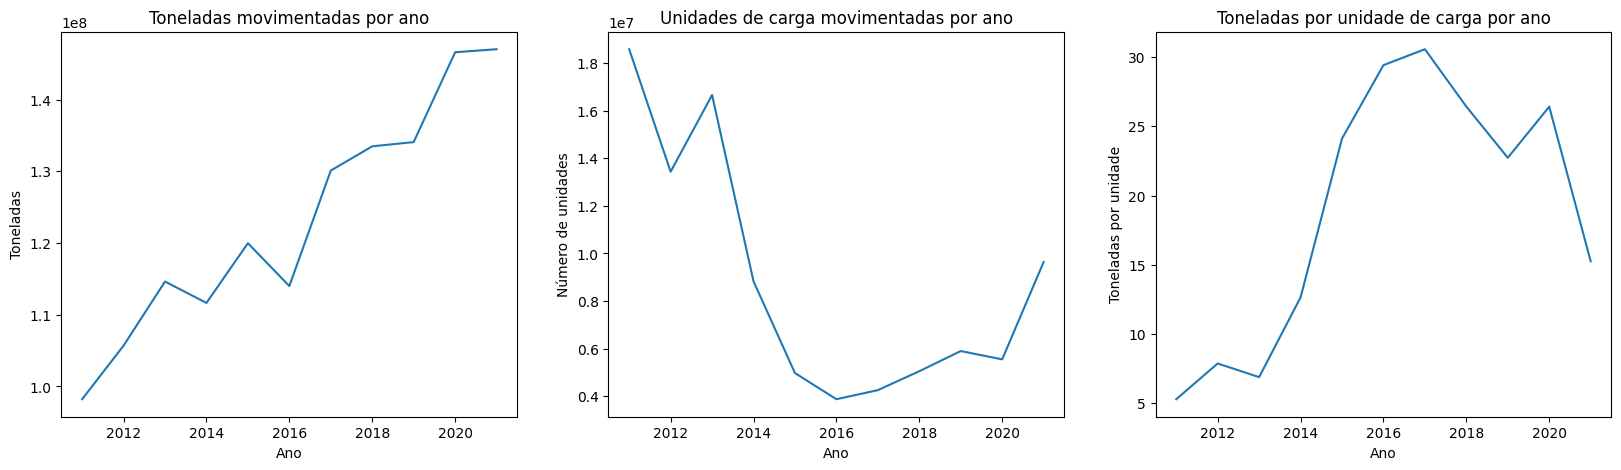

In [133]:
anos = list(range(2011, 2022, 1))
print(anos)
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.title('Toneladas movimentadas por ano')
plt.xlabel('Ano')
plt.ylabel('Toneladas')
plt.plot(anos, toneladas_por_ano)

plt.subplot(1, 3, 2)
plt.title('Unidades de carga movimentadas por ano')
plt.xlabel('Ano')
plt.ylabel('Número de unidades')
plt.plot(anos, unidades_por_ano)

plt.subplot(1, 3, 3)
plt.title('Toneladas por unidade de carga por ano')
plt.xlabel('Ano')
plt.ylabel('Toneladas por unidade')
plt.plot(anos, toneladas_por_unidade_por_ano)

In [139]:
df = pd.DataFrame(list(zip(pibs.iloc[0][1:], pibs.iloc[1][1:], toneladas_por_ano, unidades_por_ano, toneladas_por_unidade_por_ano)), columns=['PIB de Santos', 'PIB de SP', 'Toneladas anuais', 'Unidades anuais', 'Toneladas por unidade'])

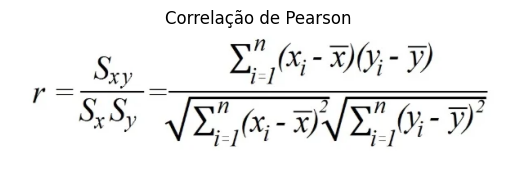

In [147]:
plt.title('Correlação de Pearson')
plt.axis('off')
plt.imshow(plt.imread('C:\\Users\\Gabriel\\Desktop\\correlacao-1.webp'))

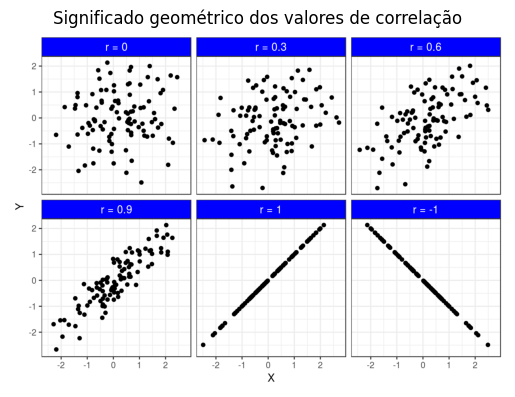

In [150]:
plt.title('Significado geométrico dos valores de correlação')
plt.axis('off')
plt.imshow(plt.imread('C:\\Users\\Gabriel\\Desktop\\unnamed-chunk-4-1.png'))

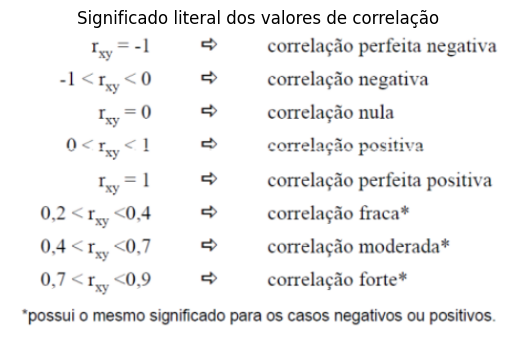

In [157]:
plt.title('Significado literal dos valores de correlação')
plt.axis('off')
plt.imshow(plt.imread('C:\\Users\\Gabriel\\Desktop\\corr.png'))

<Axes: >

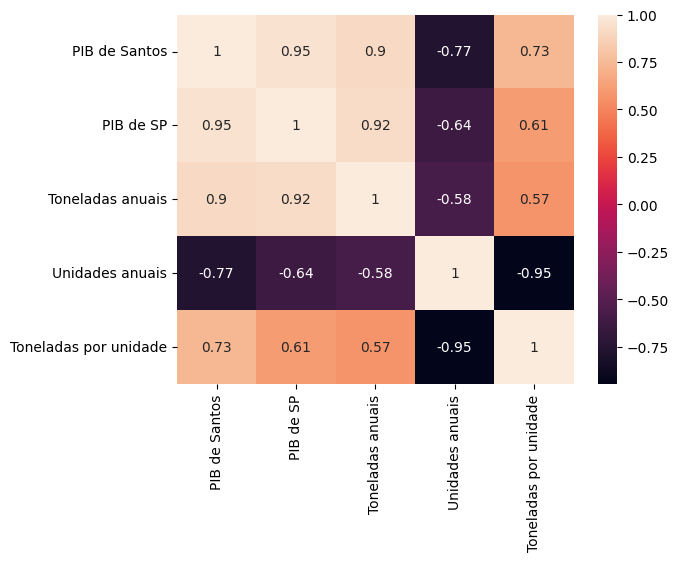

In [141]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
pibs.iloc[0][1:], pibs.iloc[1][1:], toneladas_por_ano, unidades_por_ano, toneladas_por_unidade_por_ano

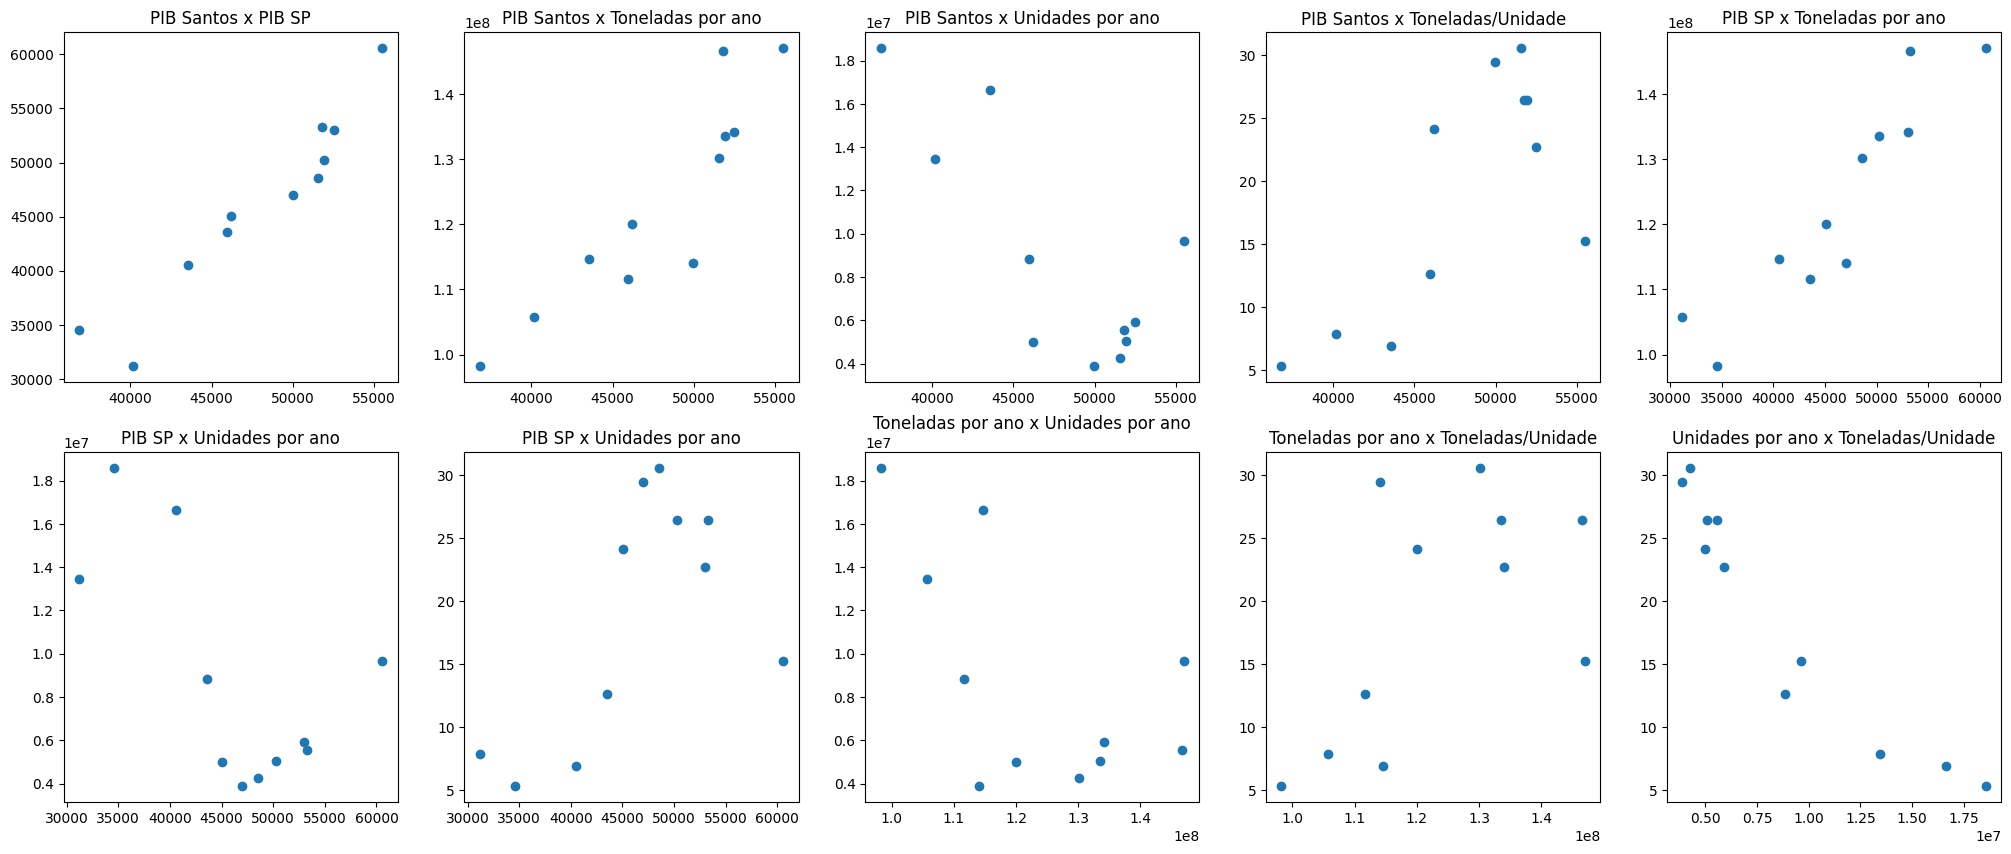

In [156]:
plt.figure(figsize=(25, 10))
plt.subplot(2, 5, 1)
plt.title('PIB Santos x PIB SP')
plt.scatter(pibs.iloc[0][1:], pibs.iloc[1][1:])
plt.subplot(2, 5, 2)
plt.title('PIB Santos x Toneladas por ano')
plt.scatter(pibs.iloc[0][1:], toneladas_por_ano)
plt.subplot(2, 5, 3)
plt.title('PIB Santos x Unidades por ano')
plt.scatter(pibs.iloc[0][1:], unidades_por_ano)
plt.subplot(2, 5, 4)
plt.title('PIB Santos x Toneladas/Unidade')
plt.scatter(pibs.iloc[0][1:], toneladas_por_unidade_por_ano)
plt.subplot(2, 5, 5)
plt.title('PIB SP x Toneladas por ano')
plt.scatter(pibs.iloc[1][1:], toneladas_por_ano)
plt.subplot(2, 5, 6)
plt.title('PIB SP x Unidades por ano')
plt.scatter(pibs.iloc[1][1:], unidades_por_ano)
plt.subplot(2, 5, 7)
plt.title('PIB SP x Unidades por ano')
plt.scatter(pibs.iloc[1][1:], toneladas_por_unidade_por_ano)
plt.subplot(2, 5, 8)
plt.title('Toneladas por ano x Unidades por ano')
plt.scatter(toneladas_por_ano, unidades_por_ano)
plt.subplot(2, 5, 9)
plt.title('Toneladas por ano x Toneladas/Unidade')
plt.scatter(toneladas_por_ano, toneladas_por_unidade_por_ano)
plt.subplot(2, 5, 10)
plt.title('Unidades por ano x Toneladas/Unidade')
plt.scatter(unidades_por_ano, toneladas_por_unidade_por_ano)